# Import Modules
- Loading all the modules used in the Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt
import geopandas as gpd
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Loading Dataset and Preprocessing
- Loading the dataset and performing some data cleaning and wrangling before processing with the Analysis

In [2]:
# Loading Dataset
dataset = pd.read_csv('AB_NYC_2019.csv')

In [3]:
dataset.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
# total size of dataset
dataset.shape

(48895, 16)

In [5]:
# checking total null values in each column
dataset.isnull().sum(axis = 0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Data Wrangling

### Reviews per month missing values

In [6]:
# All the missing values in review per month are related to 0 reviews in the column 'number of reviews'
# to cater for this problem we will replace nulls with 0 meaning reviews per month are 0
dataset[dataset['number_of_reviews']== 0]['reviews_per_month'].isnull().value_counts()

True    10052
Name: reviews_per_month, dtype: int64

In [7]:
# Nan values are replaces with 0 here
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)


In [8]:
dataset.isnull().sum(axis = 0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Removing Remaining columns with missing values.
- For the analysis , the following columns are not used and hence removed
- id
- name
- host_name
- last_review

In [9]:
# Removing above mentioned columns
dataset.drop(columns = ['id' , 'name','host_name' , 'last_review' ] , inplace=True)

In [10]:
dataset.isnull().sum(axis = 0)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Removing Anomalies in the column reviews_per_month
- the column should logically not contain more than 31 or 30 reviews per month.
- in case a value greater than 31 exists, it is removed.

In [11]:
#One value greater than 31 exists and will be removed
dataset[dataset['reviews_per_month']>31]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42075,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.5,9,299


In [12]:
# Values less than or equal to 31 are kept
dataset = dataset[dataset['reviews_per_month']<=31]
dataset

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


### Removing hostings with prices mentioned 0

In [13]:
# total number of listings with price 0
dataset[dataset['price']==0]['host_id'].count()

11

In [14]:
dataset = dataset[dataset['price']>0]

### Giving Each Apartment a 'numeric_id' using the lat long values
- The lat long values represent the location of each apartment.
- using those values unique numeric ids are provided to each of the listings
- the host id represents the airbnb hosts id and it is not unique as one host can have multiple listings
- This will be seen later on in the analysis aswell

In [15]:
# New column called unique place is created which is a joined string value between latitude and longitude
dataset['unique_place'] = dataset['latitude'].astype(str) + dataset['longitude'].astype(str)
#storing all unique places
c = dataset['unique_place'].unique()
# creating new dataframe with these unique values
c_df = pd.DataFrame(c, columns = ['unique_place'])
# adding new column which gives numeric value to each unqiue place
c_df['numeric_id'] = c_df.index
# numeric values are mapped to the original dataset
dataset = dataset.merge(c_df , how='left' , on='unique_place')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
dataset

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,unique_place,numeric_id
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,40.647490000000005-73.97237,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,40.75362-73.98376999999999,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,40.809020000000004-73.9419,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,40.685140000000004-73.95976,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,40.79851-73.94399,4
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,40.74767-73.975,5
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,40.68688-73.95596,6
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220,40.76489-73.98493,7
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0,40.80178-73.96723,8
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188,40.713440000000006-73.99037,9


# Data Analysis
- Here we will find some insights related to the data.

## Price Distribution

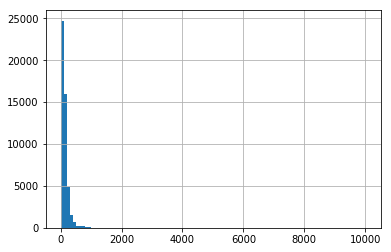

In [17]:
# As we can see below, majority of the listings have a price below 2000
dataset['price'].hist(bins=100)

In [18]:
# Removing Outliers
dataset[dataset['price'] > 2000].count()['unique_place']

86

In [19]:
dataset = dataset[dataset['price']<=2000]

## Which host listed the most Number of listings

In [20]:
# Grouping the listings for each host
top_host = dataset.groupby('host_id').count()['numeric_id'].reset_index()
# sorting by highest listings
top_host.sort_values(by='numeric_id' , ascending = False , inplace=True)

In [21]:
top_host

,host_id,numeric_id
34590,219517861,327
29360,107434423,232
19542,30283594,121
31030,137358866,103
14408,16098958,96
12780,12243051,96
25623,61391963,91
17060,22541573,87
33813,200380610,65
9713,7503643,52


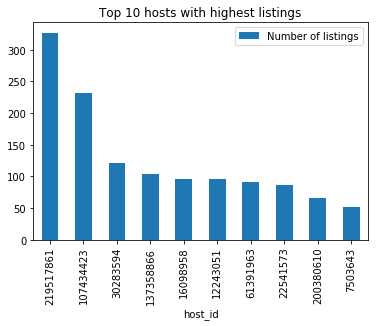

In [22]:
# Barplot of the top ten highest listers 
top_host.iloc[0:10,:].plot(kind='bar' , x='host_id' , y= 'numeric_id' , label = 'Number of listings' , title='Top 10 hosts with highest listings')

## Price Distributions per neighborhood
- Seaborn's violinplot is a great means to analyse several statistical apsects together.
- Here we will check the mean prices and the density at different prices for all neighborhood groups.

In [23]:
# Number of listings in each neighborhood
dataset.groupby(['neighbourhood_group']).count()['numeric_id'].reset_index()

,neighbourhood_group,numeric_id
0,Bronx,1089
1,Brooklyn,20076
2,Manhattan,21597
3,Queens,5663
4,Staten Island,372


In [24]:
# Using the describe function we can extract the count, mean and deviations of the listings in each neighborhood
dataset.groupby(['neighbourhood_group']).describe()['price'].reset_index()

,neighbourhood_group,count,mean,std,min,25%,50%,75%,max
0,Bronx,1089.0,85.361800,77.761144,10.0,45.0,65.0,99.00,1000.0
1,Brooklyn,20076.0,120.284220,111.507947,10.0,60.0,90.0,150.00,2000.0
2,Manhattan,21597.0,185.538130,163.855377,10.0,95.0,150.0,220.00,2000.0
3,Queens,5663.0,96.930426,92.847334,10.0,50.0,75.0,110.00,2000.0
4,Staten Island,372.0,101.680108,113.055778,13.0,50.0,75.0,109.25,1250.0


Text(0.5, 1.0, 'Mean and Distribution of prices in different neighborhoods')

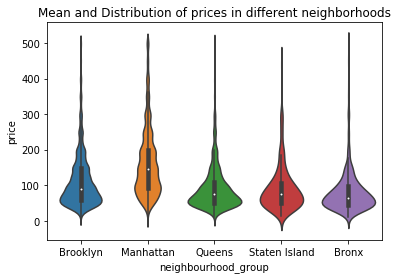

In [25]:
#Using the seaborn violinplot we are plotting the mean and the density distribution of listings at different prices
# within eahc neighborhood
ax = sns.violinplot(x="neighbourhood_group", y="price", data=dataset[dataset['price']<=500] , figsize=(30,25) )
ax.set_title('Mean and Distribution of prices in different neighborhoods')

## Distribution of listings in each neighborhood per room_type
- Here we will look at the percentage distribution of different room types (Entire apt, Private room , Shared room) for each neighborhood group to see if some distinguishable patterns exist between different neighborhoods.

In [26]:
# grouping room types per neighborhood and checking count
room_type = dataset.groupby(['room_type' , 'neighbourhood_group']).count()['numeric_id'].reset_index()

In [27]:
# Calculating the percentages of room types in each neighborhood
room_type['percentage'] = (room_type['numeric_id'] / room_type.groupby('neighbourhood_group')['numeric_id'].transform('sum'))*100

In [28]:
room_type.head()

,room_type,neighbourhood_group,numeric_id,percentage
0,Entire home/apt,Bronx,379,34.802571
1,Entire home/apt,Brooklyn,9543,47.534369
2,Entire home/apt,Manhattan,13145,60.864935
3,Entire home/apt,Queens,2094,36.976867
4,Entire home/apt,Staten Island,175,47.043011


Text(0.5, 0.98, 'Percentage breakdown of different room types in different neighborhoods')

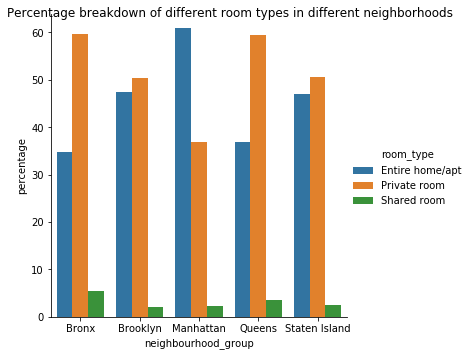

In [29]:
#Using the seaborn catplot we plot the bar plot to compare the percentage distributions of room types for each neighborhood
ax = sns.catplot(x = "neighbourhood_group", 
            y = "percentage",      
            hue = "room_type",  
            data = room_type,     
            kind = "bar")
ax.fig.suptitle('Percentage breakdown of different room types in different neighborhoods')

## Ranking top neighborhoods to open airbnb
- This has been based after deciding upon some metrics and creating a 'Yield' that acts as a final performance metric in deciding what locality is good for opening an Airbnb.
- Things analysed to calculate Yield:
- 1. Number of reviews per listing (Higher number of reviews generally would mean the listing is used frequently hence in high demand).
- Number of listings in a neighborhood. (A neighborhood with low number of listings but high number of reviews would mean it is potentially a hotspot for opening an Airbnb.)
- Mean/Median price in neighborhood. (Price would certainly pay a big role in terms of risk and reward. A neighborhood high in demand with higher prices would provide larger yields as comppared to a neighborhood high in demand but a lower mean/median price)

In [30]:
# sorting the dataframe by the highest number of reviews
no_of_rev = dataset.sort_values(by = 'number_of_reviews' , ascending=False)

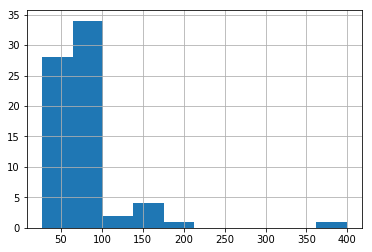

In [31]:
#checking distribution of specific departments
# Some outliers generally exist
no_of_rev[no_of_rev['neighbourhood']== 'Kingsbridge']['price'].hist()

In [32]:
# Here we are performing a groupby per neighborhood
# 1. The median price of the listings is taken per group
# 2. The total number of reviews are summed up per group
# 3. Total number of listings per group
# 4. The mean Lat Long values of each group based on the listings available
x = no_of_rev.groupby(['neighbourhood_group' , 'neighbourhood' ]).agg({'number_of_reviews':['sum'],'unique_place':['count'],'price':['median'] ,'longitude':['mean'],'latitude':['mean']}).reset_index()
x.columns = x.columns.get_level_values(0)
x.head()

,neighbourhood_group,neighbourhood,longitude,price,unique_place,number_of_reviews,latitude
0,Bronx,Allerton,-73.858727,66.5,42,1803,40.865292
1,Bronx,Baychester,-73.842967,75.0,7,310,40.873616
2,Bronx,Belmont,-73.887109,52.5,24,296,40.855062
3,Bronx,Bronxdale,-73.866287,50.0,19,458,40.854731
4,Bronx,Castle Hill,-73.847000,39.0,9,118,40.816889


In [33]:
# Sorting the sequences of the columns used
#x.columns = ['neighbourhood_group' , 'neighbourhood' , 'number_of_reviews', 'price'    , 'longitude', 'latitude', 'unique_place' ]
x = x[['neighbourhood_group' , 'neighbourhood' , 'price' , 'unique_place',  'number_of_reviews' ,'latitude' ,'longitude' ]]
x

,neighbourhood_group,neighbourhood,price,unique_place,number_of_reviews,latitude,longitude
0,Bronx,Allerton,66.5,42,1803,40.865292,-73.858727
1,Bronx,Baychester,75.0,7,310,40.873616,-73.842967
2,Bronx,Belmont,52.5,24,296,40.855062,-73.887109
3,Bronx,Bronxdale,50.0,19,458,40.854731,-73.866287
4,Bronx,Castle Hill,39.0,9,118,40.816889,-73.847000
5,Bronx,City Island,97.5,18,759,40.847872,-73.787054
6,Bronx,Claremont Village,68.5,28,350,40.839185,-73.909279
7,Bronx,Clason Point,80.0,21,316,40.811750,-73.856790
8,Bronx,Co-op City,77.5,2,34,40.864815,-73.823240
9,Bronx,Concourse,81.0,50,1643,40.826919,-73.924469


In [34]:
# calculating Yield
# The yield is calculated by taking the ratio between the number of reviews and number of places in a group and 
# multiplying the result by the median price in that group
x['yield'] = (x['number_of_reviews'] / x['unique_place'])* x['price']
#considering neighborhoods with atleast 50 listings (smaller neighborhoods will provide inaccurate sample size)
x = x[x['unique_place']>50]
#sorting the values
x.sort_values(by='yield' , ascending=False , inplace = True)
#x = x.iloc[0:10,:]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Ranking on map
- Based on the yield calculated in the previous part, now we are going to map that on map of Newyork divided by neighborhoods.
- For this we will use some Geopandas manipulations 
- That Newyorkcity map has been taken from 'https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas-NTA-/cpf4-rkhq'

In [35]:
# Converting the yield calculated dataframe into a geopandas dataframe called data
data = gpd.GeoDataFrame(x, geometry=gpd.points_from_xy(x.longitude, x.latitude))
data.head()

,neighbourhood_group,neighbourhood,price,unique_place,number_of_reviews,latitude,longitude,yield,geometry
172,Queens,Springfield Gardens,80.0,85,5873,40.667690,-73.762428,5527.529412,POINT (-73.76243 40.66769)
90,Brooklyn,South Slope,135.0,284,10405,40.664926,-73.985421,4946.038732,POINT (-73.98542 40.66493)
141,Queens,East Elmhurst,60.0,185,15107,40.762784,-73.878680,4899.567568,POINT (-73.87868 40.76278)
62,Brooklyn,Cobble Hill,156.0,99,2888,40.687267,-73.995554,4550.787879,POINT (-73.99555 40.68727)
106,Manhattan,Hell's Kitchen,167.0,1954,50221,40.762163,-73.991471,4292.173490,POINT (-73.99147 40.76216)


In [36]:
nyc_area = pd.read_csv('nynta.csv')

#Changing the Column name 'NTAName' to neighborhood to match with our column name
nyc_area.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#Converting the geometry column text into well known text(wkt) which allows plotting of the geometry
nyc_area['geom'] = nyc_area['the_geom'].apply(wkt.loads)

#Dataframe is  now converted into a geopandas dataframe
nyc_area = gpd.GeoDataFrame(nyc_area, geometry='geom')

In [37]:
nyc_area

,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,neighbourhood,Shape_Leng,Shape_Area,geom
0,3,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,Brooklyn,BK88,Borough Park,39247.227831,5.400502e+07,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ..."
1,4,MULTIPOLYGON (((-73.80379022888246 40.77561011...,81,Queens,QN51,Murray Hill,33266.904872,5.248828e+07,"MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ..."
2,4,MULTIPOLYGON (((-73.8610972440186 40.763664477...,81,Queens,QN27,East Elmhurst,19816.712132,1.972685e+07,"MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ..."
3,3,MULTIPOLYGON (((-73.94826499590911 40.63860718...,47,Brooklyn,BK95,Erasmus,18756.701865,1.452260e+07,"MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ..."
4,4,MULTIPOLYGON (((-73.75725671509139 40.71813860...,81,Queens,QN07,Hollis,20976.335600,2.288777e+07,"MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ..."
5,3,MULTIPOLYGON (((-73.95859278495766 40.61040303...,47,Brooklyn,BK25,Homecrest,27514.022918,2.999197e+07,"MULTIPOLYGON (((-73.95859 40.61040, -73.95828 ..."
6,4,MULTIPOLYGON (((-73.77757506948126 40.73019327...,81,Queens,QN41,Fresh Meadows-Utopia,22106.431272,2.777485e+07,"MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ..."
7,2,MULTIPOLYGON (((-73.89483522923975 40.82624684...,5,Bronx,BX33,Longwood,18982.130068,1.073245e+07,"MULTIPOLYGON (((-73.89484 40.82625, -73.89487 ..."
8,3,MULTIPOLYGON (((-73.96014773493862 40.62891518...,47,Brooklyn,BK43,Midwood,27996.590612,3.579957e+07,"MULTIPOLYGON (((-73.96015 40.62892, -73.95996 ..."
9,4,MULTIPOLYGON (((-73.75205066516907 40.70522802...,81,Queens,QN08,St. Albans,45401.317004,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."


In [38]:
#Now, do a spatial join... This code here runs an intersect analysis to find which neighborhood the Airbnb location is in
# A spatial join is done mapping the yield neighborhoods 
# the intersect allows the mapping of each point to the neighborhood polygon in which it belongs
joined = gpd.sjoin(nyc_area, data, how='inner', op='intersects')
joined

,BoroCode,the_geom,CountyFIPS,BoroName,NTACode,neighbourhood_left,Shape_Leng,Shape_Area,geom,index_right,neighbourhood_group,neighbourhood_right,price,unique_place,number_of_reviews,latitude,longitude,yield
0,3,MULTIPOLYGON (((-73.97604935657381 40.63127590...,47,Brooklyn,BK88,Borough Park,39247.227831,5.400502e+07,"MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...",54,Brooklyn,Borough Park,53.5,136,2232,40.637273,-73.997031,878.029412
8,3,MULTIPOLYGON (((-73.96014773493862 40.62891518...,47,Brooklyn,BK43,Midwood,27996.590612,3.579957e+07,"MULTIPOLYGON (((-73.96015 40.62892, -73.95996 ...",81,Brooklyn,Midwood,75.0,109,1655,40.620207,-73.959672,1138.761468
9,4,MULTIPOLYGON (((-73.75205066516907 40.70522802...,81,Queens,QN08,St. Albans,45401.317004,7.741275e+07,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",173,Queens,St. Albans,61.5,76,2584,40.695668,-73.762068,2091.000000
10,3,MULTIPOLYGON (((-73.95337017508862 40.68064050...,47,Brooklyn,BK69,Clinton Hill,23971.466027,2.052820e+07,"MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...",61,Brooklyn,Clinton Hill,120.0,569,14580,40.688104,-73.964394,3074.868190
15,3,MULTIPOLYGON (((-73.97084113729679 40.64637857...,47,Brooklyn,BK41,Kensington-Ocean Parkway,20800.752358,1.589331e+07,"MULTIPOLYGON (((-73.97084 40.64638, -73.97077 ...",79,Brooklyn,Kensington,70.0,175,2972,40.641749,-73.975702,1188.800000
16,3,MULTIPOLYGON (((-73.96514385192519 40.59110191...,47,Brooklyn,BK26,Gravesend,39922.674156,3.134195e+07,"MULTIPOLYGON (((-73.96514 40.59110, -73.96530 ...",77,Brooklyn,Gravesend,70.0,68,1336,40.595598,-73.976896,1375.294118
20,3,MULTIPOLYGON (((-73.91804606958479 40.68721324...,47,Brooklyn,BK35,Stuyvesant Heights,28239.080771,3.140694e+07,"MULTIPOLYGON (((-73.91805 40.68721, -73.91800 ...",50,Brooklyn,Bedford-Stuyvesant,80.0,3707,110050,40.687199,-73.939828,2374.966280
21,1,MULTIPOLYGON (((-73.97854094647867 40.73688765...,61,Manhattan,MN21,Gramercy,12096.891174,7.526914e+06,"MULTIPOLYGON (((-73.97854 40.73689, -73.97857 ...",103,Manhattan,Gramercy,165.0,337,7681,40.735569,-73.984293,3760.727003
27,3,MULTIPOLYGON (((-73.93229708542631 40.70774944...,47,Brooklyn,BK78,Bushwick South,40735.742384,4.016945e+07,"MULTIPOLYGON (((-73.93230 40.70775, -73.93392 ...",58,Brooklyn,Bushwick,65.0,2462,52491,40.696746,-73.920382,1385.830626
29,4,MULTIPOLYGON (((-73.9047724456856 40.712865799...,81,Queens,QN20,Ridgewood,40608.513200,5.049518e+07,"MULTIPOLYGON (((-73.90477 40.71287, -73.90377 ...",168,Queens,Ridgewood,60.0,423,7778,40.704078,-73.905902,1103.262411


In [39]:
# nyc_area['coords'] = nyc_area['geom'].apply(lambda x: x.representative_point().coords[:])
# nyc_area['coords'] = [coords[0] for coords in nyc_area['coords']]

In [40]:
# nyc_area.plot(color='white', edgecolor='black' ,figsize=(15,10))
# for idx, row in nyc_area.iterrows():
#     plt.annotate(s=row['neighbourhood'], xy=row['coords'],
#                  horizontalalignment='center')

Text(0.5, 1.0, 'Best Spots to Open an AirBnB in NYC')

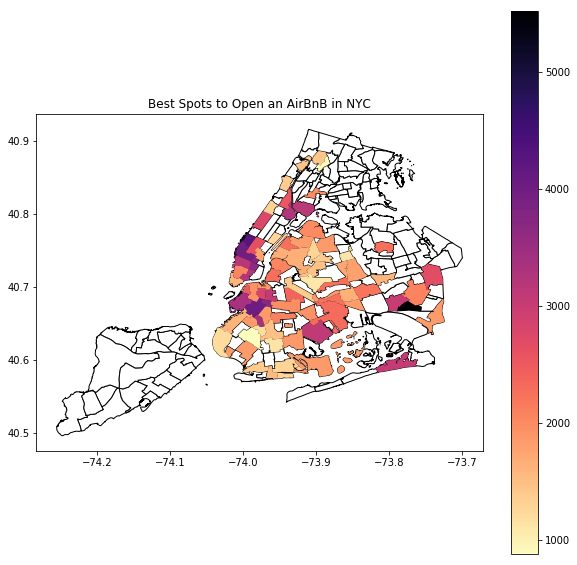

In [42]:
#Plotting the joined geopandas dataframe
# The plotted diagram would map the neighborhoods that can potentially provide the highest yield
fig,ax = plt.subplots(1,1, figsize=(10,10))

base = nyc_area.plot(color='white', edgecolor='black', ax=ax )

joined.plot(column='yield',cmap='magma_r', ax=base, legend=True)
plt.title('Best Spots to Open an AirBnB in NYC')


In [45]:
joined[['neighbourhood_group' , 'neighbourhood_right' , 'price' , 'unique_place' , 'number_of_reviews' , 'yield']].sort_values(by='yield' , ascending=False)

,neighbourhood_group,neighbourhood_right,price,unique_place,number_of_reviews,yield
116,Queens,Springfield Gardens,80.0,85,5873,5527.529412
72,Brooklyn,South Slope,135.0,284,10405,4946.038732
140,Queens,East Elmhurst,60.0,185,15107,4899.567568
102,Brooklyn,Cobble Hill,156.0,99,2888,4550.787879
39,Manhattan,Hell's Kitchen,167.0,1954,50221,4292.173490
81,Manhattan,Chelsea,199.0,1106,23640,4253.490054
72,Brooklyn,Park Slope,145.0,505,14638,4202.990099
72,Brooklyn,Gowanus,129.0,247,7709,4026.157895
147,Manhattan,SoHo,198.0,355,7193,4011.870423
81,Manhattan,Flatiron District,225.0,80,1419,3990.937500
